# Numerische Approximation bestimmter Integrale


## Einleitung

In dieser Arbeit untersuchen wir die numerische Approximation bestimmter Integrale mit drei klassischen Verfahren:
- Sekanten-Trapezregel
- Tangenten-Trapezregel
- Simpsonsche Regel

Diese Methoden dienen der näherungsweisen Berechnung von Integralen, wenn keine analytische Lösung möglich oder gewünscht ist.



## Theoretische Grundlagen

### Bestimmtes Integral
Ein bestimmtes Integral $\int_a^b f(x) dx$ beschreibt die Fläche unter der Kurve $f(x)$ im Intervall $[a, b]$.

### Sekanten-Trapezregel
Die Fläche unter $f(x)$ wird durch Trapeze approximiert, die durch Sekanten bestimmt werden.
$$
\int_a^b f(x) dx \approx \frac{h}{2} \left[ f(x_0) + 2 \sum_{i=1}^{n-1} f(x_i) + f(x_n) \right]
$$

### Tangenten-Trapezregel
Hier wird die Fläche durch Tangenten-Näherung ersetzt, oft ähnlich wie bei der Mittelpunktsregel. Wir nehmen den Mittelwert über Tangentenpunkte.

### Simpsonsche Regel
Diese Regel nutzt Parabeln zur Approximation:
$$
\int_a^b f(x) dx \approx \frac{h}{3} \left[ f(x_0) + 4 \sum_{i=1}^{n/2} f(x_{2i-1}) + 2 \sum_{i=1}^{n/2-1} f(x_{2i}) + f(x_n) \right]
$$
Voraussetzung: $n$ muss gerade sein.


In [1]:

import numpy as np
import matplotlib.pyplot as plt

def sekanten_trapez_regel(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])

def tangenten_trapez_regel(f, a, b, n):
    h = (b - a) / n
    x_mid = np.linspace(a + h/2, b - h/2, n)
    y_mid = f(x_mid)
    return h * np.sum(y_mid)

def simpson_regel(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("n muss gerade sein für Simpsons Regel")
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return (h / 3) * (y[0] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2]) + y[-1])


In [2]:

import math

funktionen = [
    (lambda x: 1/x, 1, 2, "∫₁² 1/x dx", math.log(2)),
    (lambda x: x**3 + 3*x**2, 0, 1, "∫₀¹ x³ + 3x² dx", 1**4/4 + 3*1**3/3 - 0),
    (np.cos, -np.pi/2, np.pi/2, "∫_{-π/2}^{π/2} cos(x) dx", 2)
]

ns = [2, 4, 8, 16, 32, 64]

for f, a, b, label, exact in funktionen:
    print(f"--- {label} ---")
    print(f"Exakter Wert: {exact:.10f}")
    print(f"{'n':>4} | {'Sekanten':>12} | {'Tangenten':>12} | {'Simpson':>12}")
    print("-" * 50)
    for n in ns:
        s = sekanten_trapez_regel(f, a, b, n)
        t = tangenten_trapez_regel(f, a, b, n)
        si = simpson_regel(f, a, b, n if n % 2 == 0 else n+1)
        print(f"{n:>4} | {s:>12.8f} | {t:>12.8f} | {si:>12.8f}")
    print()


--- ∫₁² 1/x dx ---
Exakter Wert: 0.6931471806
   n |     Sekanten |    Tangenten |      Simpson
--------------------------------------------------
   2 |   0.70833333 |   0.68571429 |   0.69444444
   4 |   0.69702381 |   0.69121989 |   0.69325397
   8 |   0.69412185 |   0.69266055 |   0.69315453
  16 |   0.69339120 |   0.69302521 |   0.69314765
  32 |   0.69320821 |   0.69311667 |   0.69314721
  64 |   0.69316244 |   0.69313955 |   0.69314718

--- ∫₀¹ x³ + 3x² dx ---
Exakter Wert: 1.2500000000
   n |     Sekanten |    Tangenten |      Simpson
--------------------------------------------------
   2 |   1.43750000 |   1.15625000 |   1.25000000
   4 |   1.29687500 |   1.22656250 |   1.25000000
   8 |   1.26171875 |   1.24414062 |   1.25000000
  16 |   1.25292969 |   1.24853516 |   1.25000000
  32 |   1.25073242 |   1.24963379 |   1.25000000
  64 |   1.25018311 |   1.24990845 |   1.25000000

--- ∫_{-π/2}^{π/2} cos(x) dx ---
Exakter Wert: 2.0000000000
   n |     Sekanten |    Tangenten |   

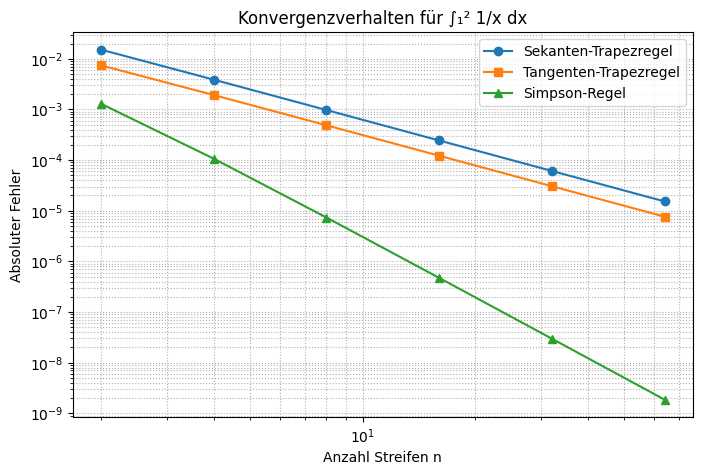

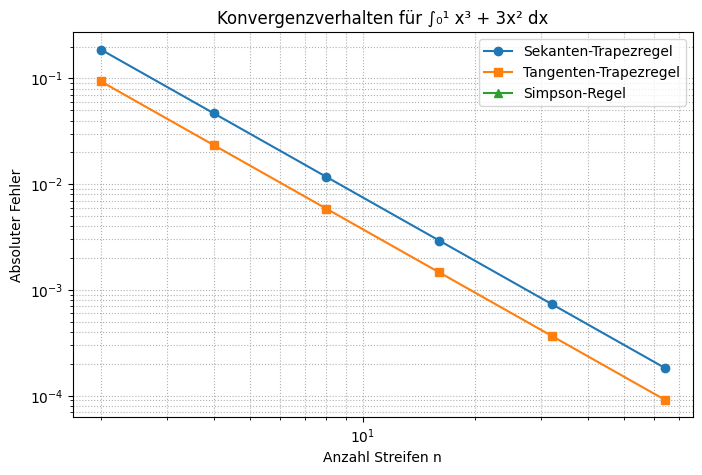

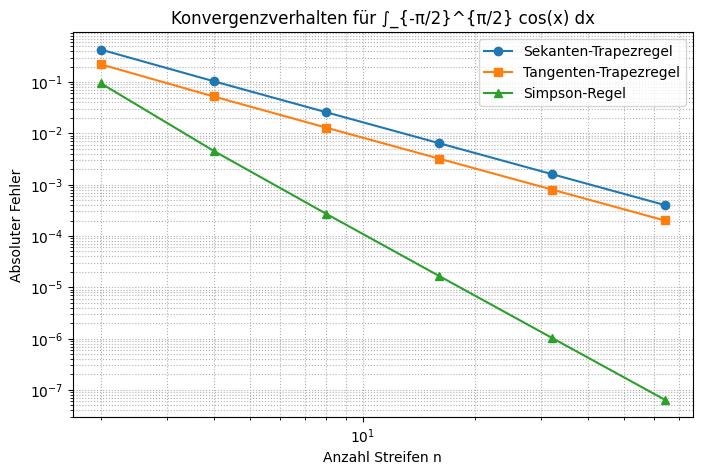

In [3]:
def plot_convergence(f, a, b, exact, ns, label):
    errors_sek = []
    errors_tan = []
    errors_sim = []
    for n in ns:
        sek = sekanten_trapez_regel(f, a, b, n)
        tan = tangenten_trapez_regel(f, a, b, n)
        sim = simpson_regel(f, a, b, n if n % 2 == 0 else n+1)
        errors_sek.append(abs(sek - exact))
        errors_tan.append(abs(tan - exact))
        errors_sim.append(abs(sim - exact))
    plt.figure(figsize=(8,5))
    plt.loglog(ns, errors_sek, 'o-', label='Sekanten-Trapezregel')
    plt.loglog(ns, errors_tan, 's-', label='Tangenten-Trapezregel')
    plt.loglog(ns, errors_sim, '^-', label='Simpson-Regel')
    plt.xlabel('Anzahl Streifen n')
    plt.ylabel('Absoluter Fehler')
    plt.title(f'Konvergenzverhalten für {label}')
    plt.legend()
    plt.grid(True, which='both', ls=':')
    plt.show()

# Plots für alle drei Integrale
for f, a, b, label, exact in funktionen:
    plot_convergence(f, a, b, exact, ns, label)


## Diskussion der Ergebnisse

- **Genauigkeit**: Die Simpsonsche Regel liefert bei gleichen $n$ die genauesten Resultate, da sie höherwertige Polynome zur Approximation nutzt.
- **Konvergenz**:
  - Trapezregel (Sekanten): konvergiert linear mit $\mathcal{O}(h^2)$.
  - Tangentenregel: ähnlich zur Mittelpunktsregel, auch $\mathcal{O}(h^2)$.
  - Simpsonsche Regel: konvergiert mit $\mathcal{O}(h^4)$ und damit wesentlich schneller.
- **Beobachtungen**: Schon bei kleinen $n$ liefert die Simpsonsche Regel erstaunlich genaue Ergebnisse.

## Schlussfolgerung und Ausblick

Numerische Integration ist ein zentrales Werkzeug der Analysis. Die Wahl des Verfahrens beeinflusst die Genauigkeit und Effizienz der Berechnung stark. In praktischen Anwendungen lohnt sich oft der Einsatz der Simpsonschen Regel – insbesondere bei glatten Funktionen.

Mögliche Erweiterungen:
- Adaption der Schrittweite (adaptive Quadratur)
- Vergleich mit Gauß-Quadraturmethoden
